In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
import sklearn

In [2]:
df = pd.read_excel('data/FilteredData_new.xlsx')
df.head()

text Sentiment  \
0   The SMS reminders from CreditCardCo are so va...  Negative   
1   The credit card rewards program from CreditCa...  Negative   
2   The text message from CreditCardCo notifying ...  Negative   
3   Hey CreditCardCo, integrating payment reminde...   Neutral   
4   Just discovered that CreditCardCo's so-called...  Negative   

           Category    Location  
0   Reminder System     Belfast  
1  Reward Programme     Belfast  
2     Miscellaneous     Belfast  
3   Reminder System  Birmingham  
4        MisSelling  Birmingham

In [3]:
df.shape

(353, 4)

# Removal of some Rows with 'channel of communication', 'Transportation','Mescilanious'

In [4]:
newdf = df.drop(df[(df['Category'] == 'Miscellaneous') | (df['Category'] == 'Channel of Communication') | (df['Category'] == 'Transparency of communication')].index, inplace=False)

In [5]:
newdf.shape

(270, 4)

In [6]:
clean= newdf['text']

In [7]:
print(type(clean))

<class 'pandas.core.series.Series'>


# Remove Emails.

In [8]:
# Remove Emails
clean = [re.sub('\S*@\S*\s?', '', sent) for sent in clean]
clean[:5]

[' The SMS reminders from CreditCardCo are so vague and cryptic. How am I supposed to remember the due date without clear information#ConfusingMessages',
 " The credit card rewards program from CreditCardCo is so convoluted that I can't even figure out how to redeem my points. #RewardFrustration",
 ' Hey CreditCardCo, integrating payment reminder ales with viual assistant platforms like Siri or Google Assistant would make it convenient for customers to stay informed. #PaymentReminders',
 " Just discovered that CreditCardCo's so-called 'exclusive offer' for retired pensioners was nothing more than a trap. The hidden fees and high costs are pushing me into financial hardship. #DeceptiveSales #MisSelling",
 ' The notification from CreditCardCo about changes to my credit limit arrived after I had already made a large purchase. Poor timing and lack of consideration! #UntimelyCommunication']

In [9]:
# Remove new line characters
clean = [re.sub('\s+', ' ', sent) for sent in clean]

In [10]:
clean[:5]

[' The SMS reminders from CreditCardCo are so vague and cryptic. How am I supposed to remember the due date without clear information#ConfusingMessages',
 " The credit card rewards program from CreditCardCo is so convoluted that I can't even figure out how to redeem my points. #RewardFrustration",
 ' Hey CreditCardCo, integrating payment reminder ales with viual assistant platforms like Siri or Google Assistant would make it convenient for customers to stay informed. #PaymentReminders',
 " Just discovered that CreditCardCo's so-called 'exclusive offer' for retired pensioners was nothing more than a trap. The hidden fees and high costs are pushing me into financial hardship. #DeceptiveSales #MisSelling",
 ' The notification from CreditCardCo about changes to my credit limit arrived after I had already made a large purchase. Poor timing and lack of consideration! #UntimelyCommunication']

In [11]:
mydata = pd.Series(clean)

In [12]:
mydata

0       The SMS reminders from CreditCardCo are so va...
1       The credit card rewards program from CreditCa...
2       Hey CreditCardCo, integrating payment reminde...
3       Just discovered that CreditCardCo's so-called...
4       The notification from CreditCardCo about chan...
                             ...                        
265    BarclaysUKHelp Hi dropped you a few direct mes...
266    BarclaysUK just written to my wife to say they...
267    BarclaysUKHelp Your staff has cancelled my eld...
268    JenniButtonUSA SarahLiz2006 adamundefined I’m ...
269    Hello there Thanks for your post! I'm very sor...
Length: 270, dtype: object

In [13]:
mydata = mydata.apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x).lower())

In [14]:
mydata[2]

' hey creditcardco integrating payment reminder ales with viual assistant platforms like siri or google assistant would make it convenient for customers to stay informed paymentreminders'

In [15]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','re'])
len(stop_words)

181

In [16]:
from nltk import word_tokenize 

In [17]:
mydata = mydata.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [18]:
mydata[268]

'jennibuttonusa sarahliz adamundefined cracking birthday thread credit cards anyone know kept chase southwest card whole time ramsey two chase cards barclays american almost covered flights italy summer'

In [19]:
print(type(mydata))

<class 'pandas.core.series.Series'>


In [20]:
newdf = newdf.reset_index(drop=True)

In [21]:
print(len(mydata))

270


In [22]:
newdf['clean_text'] = mydata

In [23]:
newdf.head(5)

text Sentiment  \
0   The SMS reminders from CreditCardCo are so va...  Negative   
1   The credit card rewards program from CreditCa...  Negative   
2   Hey CreditCardCo, integrating payment reminde...   Neutral   
3   Just discovered that CreditCardCo's so-called...  Negative   
4   The notification from CreditCardCo about chan...  Negative   

           Category            Location  \
0   Reminder System             Belfast   
1  Reward Programme             Belfast   
2   Reminder System          Birmingham   
3        MisSelling          Birmingham   
4   Reminder System  Kingston upon Hull   

                                          clean_text  
0  sms reminders creditcardco vague cryptic suppo...  
1  credit card rewards program creditcardco convo...  
2  hey creditcardco integrating payment reminder ...  
3  discovered creditcardco called exclusive offer...  
4  notification creditcardco changes credit limit...

In [24]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        270 non-null    object
 1   Sentiment   270 non-null    object
 2   Category    270 non-null    object
 3   Location    208 non-null    object
 4   clean_text  270 non-null    object
dtypes: object(5)
memory usage: 10.7+ KB


In [25]:
words_list = []
for sentence in mydata:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('creditcardco', 195),
 ('pricing', 63),
 ('card', 60),
 ('suppo', 50),
 ('credit', 42),
 ('customers', 41),
 ('customer', 39),
 ('thank', 36),
 ('reward', 34),
 ('feedback', 34),
 ('program', 29),
 ('product', 29),
 ('rewards', 28),
 ('time', 28),
 ('hey', 25),
 ('reminders', 24),
 ('reminder', 24),
 ('due', 21),
 ('payment', 21),
 ('like', 21)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'creditcardco'),
  Text(1, 0, 'pricing'),
  Text(2, 0, 'card'),
  Text(3, 0, 'suppo'),
  Text(4, 0, 'credit'),
  Text(5, 0, 'customers'),
  Text(6, 0, 'customer'),
  Text(7, 0, 'thank'),
  Text(8, 0, 'reward'),
  Text(9, 0, 'feedback'),
  Text(10, 0, 'program'),
  Text(11, 0, 'product'),
  Text(12, 0, 'rewards'),
  Text(13, 0, 'time'),
  Text(14, 0, 'hey'),
  Text(15, 0, 'reminders'),
  Text(16, 0, 'reminder'),
  Text(17, 0, 'due'),
  Text(18, 0, 'payment'),
  Text(19, 0, 'like'),
  Text(20, 0, 'fees'),
  Text(21, 0, 'structure'),
  Text(22, 0, 'high'),
  Text(23, 0, 'misselling'),
  Text(24, 0, 'issue'),
  Text(25, 0, 'points'),
  Text(26, 0, 'better'),
  Text(27, 0, 'team'),
  Text(28, 0, 'needs'),
  Text(29, 0, 'apologize')])

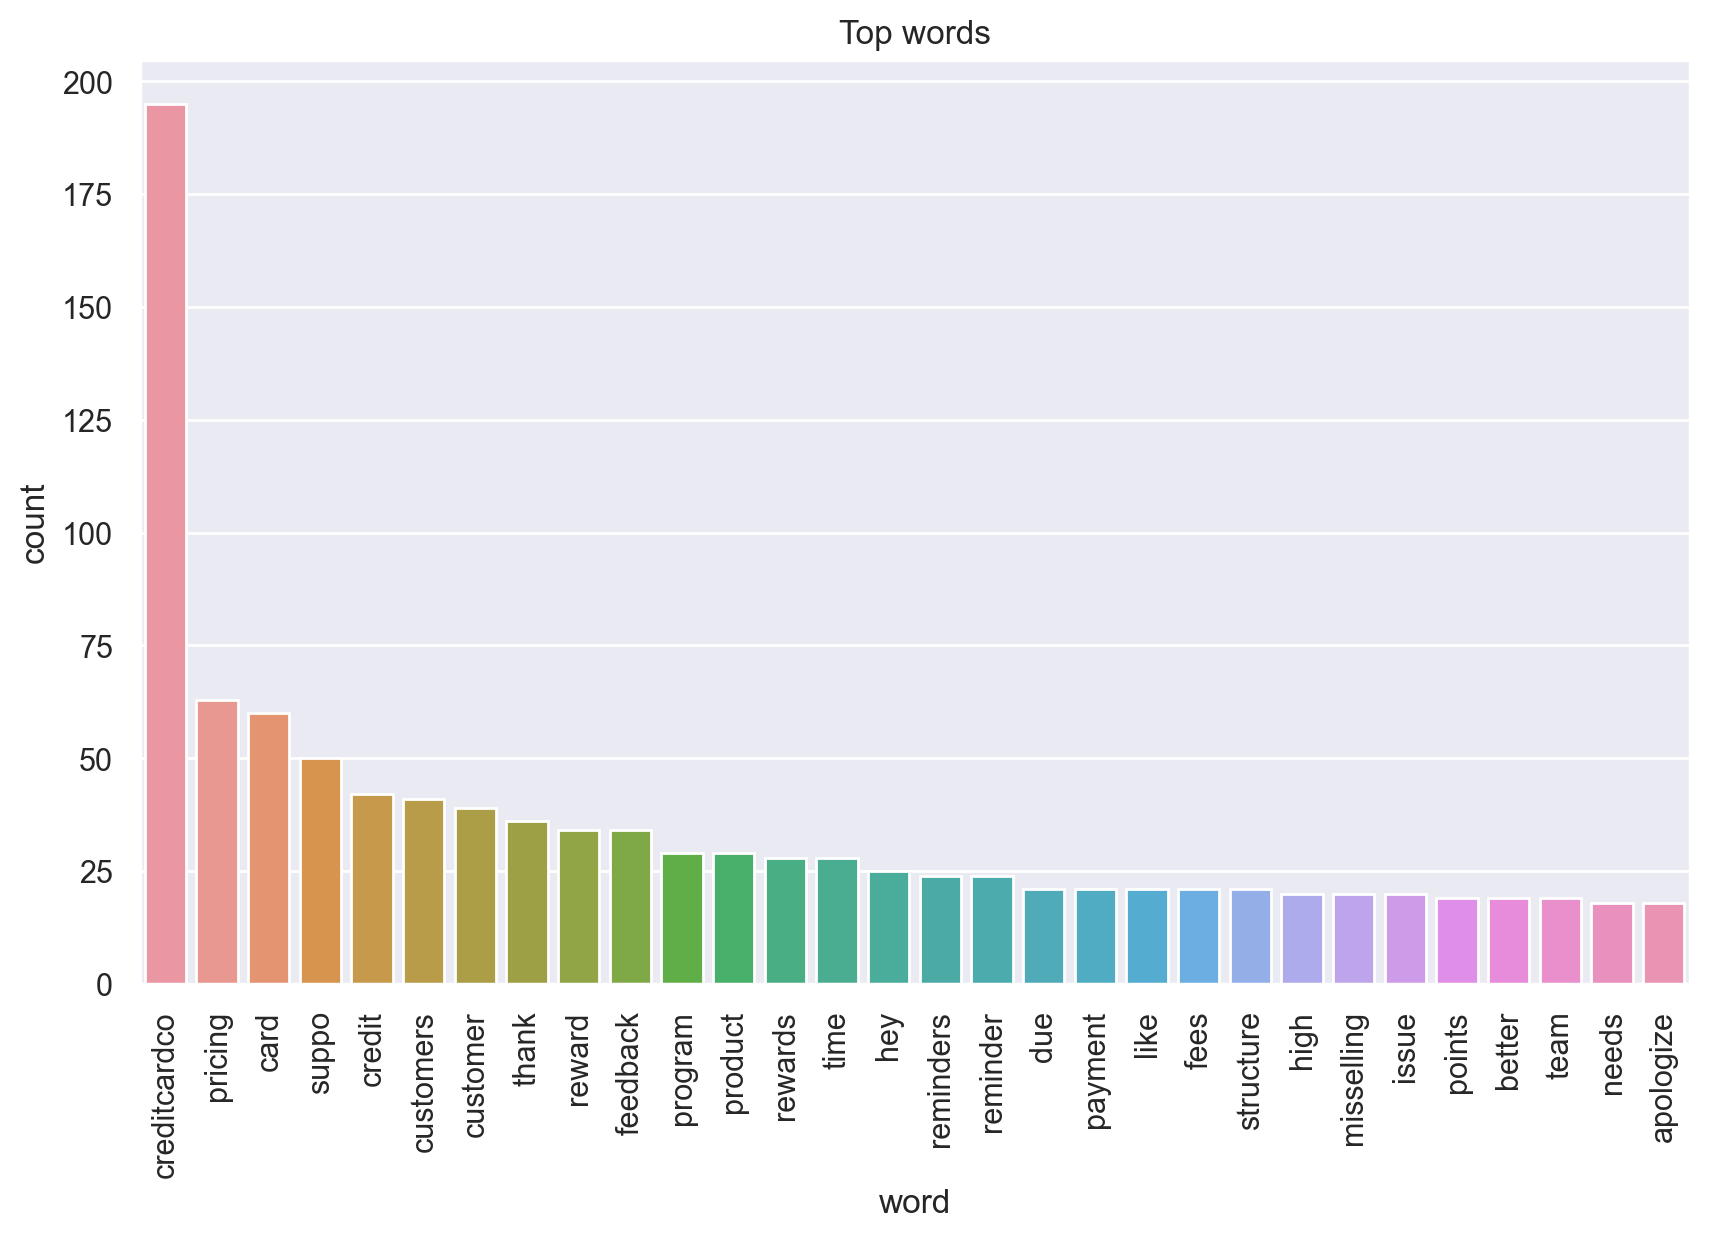

In [26]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

# Method 02 (Clustering based ) 

In [ ]:
pip install sentence-transformers

In [27]:
from sentence_transformers import SentenceTransformer

C:\Users\Satyam Dubey\Desktop\Random Test 02\boyzz\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
from sklearn.cluster import KMeans
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [29]:
corpus_embeddings = embedder.encode(mydata)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [30]:
corpus_embeddings[0]

array([-3.69422734e-02,  1.06706200e-02,  5.18840440e-02,  5.79751320e-02,
        3.24575640e-02,  8.14985037e-02,  8.48023519e-02,  2.20909547e-02,
       -1.37680862e-03, -5.05151339e-02,  2.92473938e-02, -8.97647738e-02,
        2.00377386e-02, -1.64655782e-02, -1.71629097e-02, -5.69001660e-02,
       -1.10098533e-02, -1.04673125e-01, -1.13345040e-02,  7.19406009e-02,
        5.44253625e-02,  2.12044846e-02,  1.92961469e-02,  1.04958102e-01,
        1.23602357e-02,  3.20754163e-02, -2.58421507e-02,  2.06408054e-02,
       -1.27295256e-02,  3.15183438e-02,  5.25335371e-02,  1.54412359e-01,
        7.46893659e-02,  2.33230572e-02,  2.93050800e-02,  4.11393791e-02,
       -2.34964695e-02,  4.65873070e-02, -1.27802156e-02, -7.59035395e-03,
       -8.27020332e-02, -5.14537320e-02,  3.97963822e-02,  1.41116425e-05,
        1.15888203e-02, -3.10109966e-02, -4.23286064e-03,  3.33945490e-02,
       -7.02615529e-02,  7.12804124e-02, -8.12964235e-03, -1.03674762e-01,
       -7.83603340e-02, -

In [31]:
print(type(corpus_embeddings))

<class 'numpy.ndarray'>


In [32]:
print(corpus_embeddings)

[[-0.03694227  0.01067062  0.05188404 ...  0.07360152 -0.00440462
  -0.00780598]
 [-0.08870614 -0.00427546 -0.05589168 ... -0.03171749 -0.07525445
  -0.02460718]
 [-0.13707095 -0.01021916 -0.00063998 ... -0.00674703  0.03970706
  -0.05515781]
 ...
 [-0.03753234  0.02133584  0.03630577 ... -0.06755352  0.01280132
  -0.01826418]
 [-0.07758166  0.01476265  0.00243822 ... -0.03218005 -0.0628593
   0.00470306]
 [-0.02226907  0.07610485  0.06376161 ... -0.00734625 -0.00193786
   0.03080855]]


In [33]:
clustering_model = KMeans(n_clusters=5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

C:\Users\Satyam Dubey\Desktop\Random Test 02\boyzz\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 2 1 0 3 0 0 2 2 0 2 1 2 3 0 4 0 4 4 4 4 4 4 1 3 1 3 3 1 2 1 1 1 1 1 3 1
 3 2 2 3 2 3 2 0 0 0 2 3 1 2 2 2 1 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 4 4 0 4 4 4 2 1 2 2 1 2 1 0 2 1 1 2 1 1 0 3 2 1 1 2 0 0 0 2 2 1 2
 1 2 0 3 2 1 2 2 2 2 1 2 2 1 2 2 1 2 3 2 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4
 4 4 4 4 4 4 0 1 1 0 1 2 1 1 0 0 1 1 1 3 2 1 0 0 2 2 2 1 0 1 1 2 3 2 1 1 2
 2 2 2 3 3 2 1 2 2 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 3
 3 3 3 3 2 3 3 3 3 2 3]


In [34]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(mydata[sentence_id])
    
    
# clustered_sentences                              <- uncomment to check how it forms object but it's  not very understandable

In [35]:
# Create a list to hold sentences and their labels
data_clustered = []

# Iterate through each cluster and its corresponding sentences
for cluster_id, sentences in clustered_sentences.items():
    for sentence in sentences:
        data_clustered.append({'Text': sentence, 'Label': cluster_id})

# Convert the data list into a DataFrame
final_cluster = pd.DataFrame(data_clustered)

# Save the DataFrame to a CSV file
final_cluster.to_csv('clustered_sentences.csv', index=False)

**Here I am trying to map the current cluster output to the actual dataframe**


In [36]:
# Convert the array to a DataFrame
# df_res = pd.DataFrame(cluster_assignment, columns=['Values'])

newdf['cluster'] = cluster_assignment

# Display the DataFrame
newdf.head(20)


text Sentiment  \
0    The SMS reminders from CreditCardCo are so va...  Negative   
1    The credit card rewards program from CreditCa...  Negative   
2    Hey CreditCardCo, integrating payment reminde...   Neutral   
3    Just discovered that CreditCardCo's so-called...  Negative   
4    The notification from CreditCardCo about chan...  Negative   
5    Feeling betrayed by CreditCardCo. They market...  Negative   
6    I trusted CreditCardCo to have products suita...  Negative   
7    I've been a loyal customer, but CreditCardCo'...  Negative   
8    CreditCardCo, your reward program needs a maj...  Negative   
9    Feeling betrayed by CreditCardCo. They market...  Negative   
10  Feeling frustrated with CreditCardCo's reward ...  Negative   
11  The due date reminders from CreditCardCo are e...  Negative   
12  Choosing the right credit card requires carefu...   Neutral   
13  Why does CreditCardCo always send impoant upda...  Negative   
14   Feeling scammed by CreditCardCo. They convinc...  Negative   
15  2. We apologize for any inconvenience caused b...  Positive   
16  7. Why does CreditCardCo have such high defaul...  Negative   
17  3. Thank you for bringing the issue of altered...  Positive   
18  7. We apologize for any inconvenience caused b...  Positive   
19  3. Thank you for bringing the issue of product...  Positive   

                 Category            Location  \
0         Reminder System             Belfast   
1        Reward Programme             Belfast   
2         Reminder System          Birmingham   
3              MisSelling          Birmingham   
4         Reminder System  Kingston upon Hull   
5              MisSelling          Manchester   
6              MisSelling          Manchester   
7        Reward Programme          Manchester   
8        Reward Programme          Manchester   
9              MisSelling          Manchester   
10       Reward Programme          Manchester   
11        Reminder System          Manchester   
12       Reward Programme          Manchester   
13        Reminder System          Manchester   
14             MisSelling          Nottingham   
15  Inappropriate pricing          Birmingham   
16  Inappropriate pricing          Birmingham   
17  Inappropriate pricing           Edinburgh   
18  Inappropriate pricing         Southampton   
19  Inappropriate pricing          Birmingham   

                                           clean_text  cluster  
0   sms reminders creditcardco vague cryptic suppo...        1  
1   credit card rewards program creditcardco convo...        2  
2   hey creditcardco integrating payment reminder ...        1  
3   discovered creditcardco called exclusive offer...        0  
4   notification creditcardco changes credit limit...        3  
5   feeling betrayed creditcardco marketed product...        0  
6   trusted creditcardco products suitable retired...        0  
7   loyal customer creditcardco reward program fee...        2  
8   creditcardco reward program needs major overha...        2  
9   feeling betrayed creditcardco marketed product...        0  
10  feeling frustrated creditcardco reward program...        2  
11  due date reminders creditcardco easily overloo...        1  
12  choosing right credit card requires careful co...        2  
13  creditcardco always send impoant updates weeke...        3  
14  feeling scammed creditcardco convinced purchas...        0  
15  apologize inconvenience caused pricing structu...        4  
16  creditcardco high default interest rates like ...        0  
17  thank bringing issue altered product pricing a...        4  
18  apologize inconvenience caused pricing structu...        4  
19  thank bringing issue product pricing attention...        4

In [37]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        270 non-null    object
 1   Sentiment   270 non-null    object
 2   Category    270 non-null    object
 3   Location    208 non-null    object
 4   clean_text  270 non-null    object
 5   cluster     270 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 11.7+ KB


In [38]:
direction_mapping = {1: 'reminder system', 2: 'reward programme', 4: 'product pricing', 3:'customer service', 0:'misselling'}

In [39]:
# df_res['Values'].replace(direction_mapping, inplace=True)
newdf['final_output'] = newdf['cluster'].map(direction_mapping)

In [40]:
newdf.head(10)

text Sentiment  \
0   The SMS reminders from CreditCardCo are so va...  Negative   
1   The credit card rewards program from CreditCa...  Negative   
2   Hey CreditCardCo, integrating payment reminde...   Neutral   
3   Just discovered that CreditCardCo's so-called...  Negative   
4   The notification from CreditCardCo about chan...  Negative   
5   Feeling betrayed by CreditCardCo. They market...  Negative   
6   I trusted CreditCardCo to have products suita...  Negative   
7   I've been a loyal customer, but CreditCardCo'...  Negative   
8   CreditCardCo, your reward program needs a maj...  Negative   
9   Feeling betrayed by CreditCardCo. They market...  Negative   

           Category            Location  \
0   Reminder System             Belfast   
1  Reward Programme             Belfast   
2   Reminder System          Birmingham   
3        MisSelling          Birmingham   
4   Reminder System  Kingston upon Hull   
5        MisSelling          Manchester   
6        MisSelling          Manchester   
7  Reward Programme          Manchester   
8  Reward Programme          Manchester   
9        MisSelling          Manchester   

                                          clean_text  cluster  \
0  sms reminders creditcardco vague cryptic suppo...        1   
1  credit card rewards program creditcardco convo...        2   
2  hey creditcardco integrating payment reminder ...        1   
3  discovered creditcardco called exclusive offer...        0   
4  notification creditcardco changes credit limit...        3   
5  feeling betrayed creditcardco marketed product...        0   
6  trusted creditcardco products suitable retired...        0   
7  loyal customer creditcardco reward program fee...        2   
8  creditcardco reward program needs major overha...        2   
9  feeling betrayed creditcardco marketed product...        0   

       final_output  
0   reminder system  
1  reward programme  
2   reminder system  
3        misselling  
4  customer service  
5        misselling  
6        misselling  
7  reward programme  
8  reward programme  
9        misselling

In [41]:
replacement_mapping = {'Reminder System': 'reminder system', 'Reward Programme': 'reward programme', 'Inappropriate pricing': 'product pricing', 'Ineffectual Customer Service':'customer service', 'MisSelling':'misselling'}

In [42]:
newdf['Category'].replace(replacement_mapping, inplace=True)

In [43]:
newdf.head(6)

text Sentiment  \
0   The SMS reminders from CreditCardCo are so va...  Negative   
1   The credit card rewards program from CreditCa...  Negative   
2   Hey CreditCardCo, integrating payment reminde...   Neutral   
3   Just discovered that CreditCardCo's so-called...  Negative   
4   The notification from CreditCardCo about chan...  Negative   
5   Feeling betrayed by CreditCardCo. They market...  Negative   

           Category            Location  \
0   reminder system             Belfast   
1  reward programme             Belfast   
2   reminder system          Birmingham   
3        misselling          Birmingham   
4   reminder system  Kingston upon Hull   
5        misselling          Manchester   

                                          clean_text  cluster  \
0  sms reminders creditcardco vague cryptic suppo...        1   
1  credit card rewards program creditcardco convo...        2   
2  hey creditcardco integrating payment reminder ...        1   
3  discovered creditcardco called exclusive offer...        0   
4  notification creditcardco changes credit limit...        3   
5  feeling betrayed creditcardco marketed product...        0   

       final_output  
0   reminder system  
1  reward programme  
2   reminder system  
3        misselling  
4  customer service  
5        misselling

In [44]:
file_name = 'Output/clustering_results.xlsx'
newdf.to_excel(file_name, index=False)

In [45]:
rows = newdf.shape[0]

In [46]:
print(rows)
print(type(rows))

270
<class 'int'>


In [47]:
match = 0
for i in range (rows):
    if newdf['Category'][i] == newdf['final_output'][i]:
        match+=1
mismatch=rows-match

In [48]:
print(match)
print(mismatch)

209
61


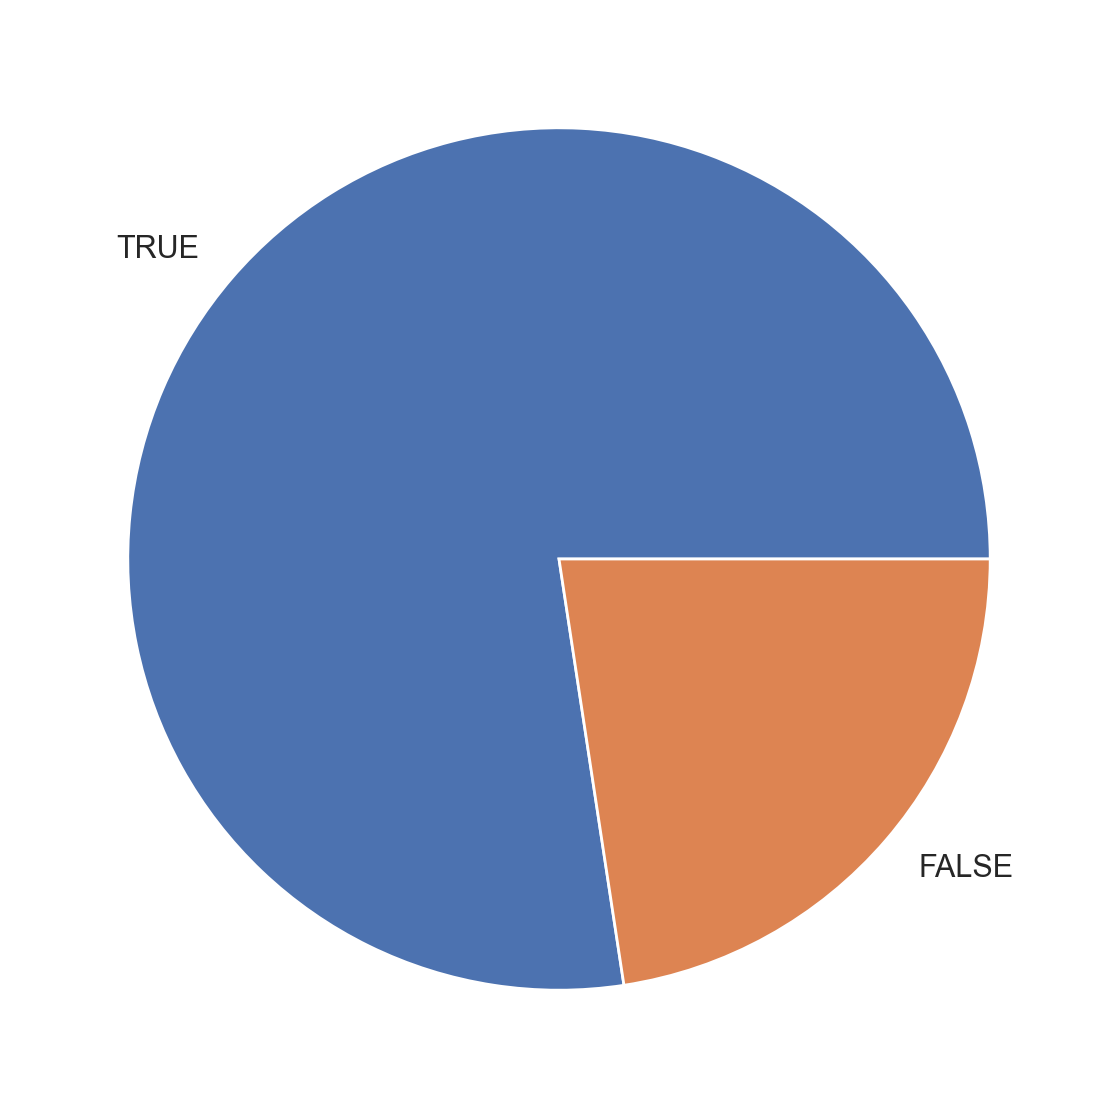

In [49]:

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
prediction_class = ['TRUE', 'FALSE']
 
data = [match,mismatch]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = prediction_class)
 
# show plot
plt.show()

In [50]:
accuracy = (match*100)/rows
print(accuracy)

77.4074074074074


# Accuracy = 78.14814814814815               ( since it's clustering output keeps changing last time I got this value ☺️

# Note: My accuracy could have gone even high but since some of the labels in you own data were misclassified so my accuracy or else it was easily 85%+